In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.model_selection import train_test_split

%matplotlib inline

## Gradient descent and cost function

### Ex. 1 - Cost function

In [2]:
# read in dataset from the course
df = pd.read_csv('/Users/dorotamierzwa/Data Science/Machine Learning - Coursera/machine-learning-ex1/ex1/ex1data1.txt',
                header=None)
df.columns = ['population_size', 'profit']
df.head()

,population_size,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population_size    97 non-null float64
profit             97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
X = df.iloc[:,0]
y = df.iloc[:,1]
X = X[:,np.newaxis]
y = y[:,np.newaxis]
m = len(df)
theta = np.zeros([2,1])

In [5]:
ones = np.ones((m,1))
X = np.hstack((ones, X)) 

In [6]:
theta

array([[0.],
       [0.]])

In [7]:
print(X.shape)
print(y.shape)

(97, 2)
(97, 1)


In [8]:
def computeCost(X, y, theta):
    m = len(y)
    sum_sqrs = np.sum(np.power((np.dot(X, theta) - y),2))
    cost = 1/(2 * m) * sum_sqrs
    return cost

In [9]:
print(computeCost(X, y, theta))

32.072733877455676


### Ex. 2 - Gradient descent

In [10]:
num_iters = 1500
alpha = 0.01

In [11]:
x_vals = X[:,1]
x_vals = x_vals[:, np.newaxis]
x_vals[:5]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598]])

In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        m = len(y)
        h = theta[0] + theta[1] * x_vals
        theta[0] = theta[0] - (alpha * 1/m * np.sum(h - y))
        theta[1] = theta[1] - (alpha * 1/m * np.sum((h - y) * x_vals))
        J_history[iter] = computeCost(X, y, theta)
    return theta

In [13]:
print(gradientDescent(X, y, theta, alpha, num_iters))

[[-3.63029144]
 [ 1.16636235]]


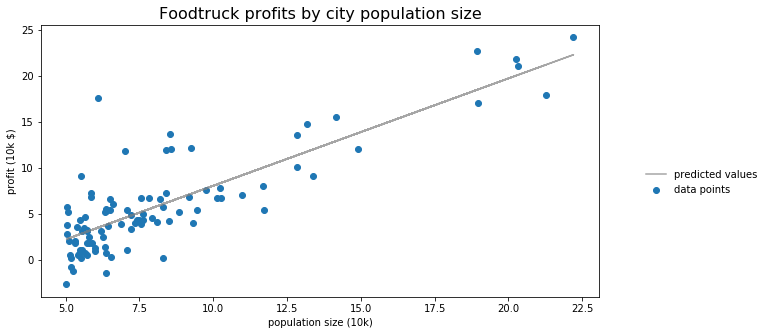

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x=df['population_size'], y=df['profit'], label='data points')
plt.plot(x_vals, np.dot(X, theta), color='grey', alpha=0.7, label='predicted values')
ax.legend(bbox_to_anchor=(1.3, 0.5), frameon=False)
ax.set_ylabel('profit (10k $)')
ax.set_xlabel('population size (10k)')
ax.set_title('Foodtruck profits by city population size', fontsize=16);

In [15]:
# predict for population of 70k with hypothesis formula
print((theta[0] + theta[1] * 7) * 10000)

[45342.45012945]


In [16]:
# predict for population of 70k with matirces
print(np.dot(np.array([[1,7]]), theta) * 10000)

[[45342.45012945]]


In [17]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
theta0_vals[:5]

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919])

In [18]:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [19]:
J_vals.shape

(100, 100)

In [20]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = np.array([[[theta0_vals[i]], [theta1_vals[j]]]])
        J_vals[i, j] = computeCost(X, y, t)

In [21]:
theta0_vals[99]

10.0

In [22]:
computeCost(1,[2],theta)

16.19756671178402

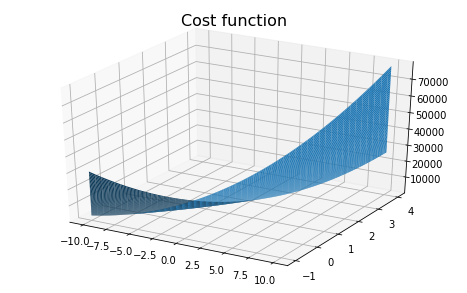

In [23]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, linewidth=0, antialiased=True)
ax.set_title('Cost function', fontsize=16);

In [24]:
def gradientDescentJ(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        m = len(y)
        h = theta[0] + theta[1] * x_vals
        theta[0] = theta[0] - (alpha * 1/m * np.sum(h - y))
        theta[1] = theta[1] - (alpha * 1/m * np.sum((h - y) * x_vals))
        J_history[iter] = computeCost(X, y, theta)
    return J_history

In [25]:
J_history = gradientDescentJ(X, y, theta, alpha, num_iters)

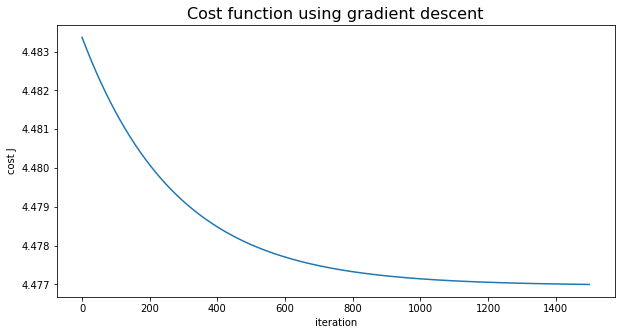

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(J_history)
ax.legend(bbox_to_anchor=(1.3, 0.5), frameon=False)
ax.set_ylabel('cost J')
ax.set_xlabel('iteration')
ax.set_title('Cost function using gradient descent', fontsize=16);

### Ex. 3 Feature normalization

In [27]:
# read in dataset from the course
df2 = pd.read_csv('/Users/dorotamierzwa/Data Science/Machine Learning - Coursera/machine-learning-ex1/ex1/ex1data2.txt',
                header=None)
df2.columns = ['size_sq_feet', 'no_bedrooms', 'price']
df2.head()

,size_sq_feet,no_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
size_sq_feet    47 non-null int64
no_bedrooms     47 non-null int64
price           47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [29]:
X2 = df2.iloc[:,:2].values
y2 = df2.iloc[:,2].values
y2 = y2[:,np.newaxis]
m2 = len(df2)

In [30]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    return X_norm

In [31]:
print(featureNormalize(X2)[:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


### Ex. 4 Cost function - multivariate linear regression

In [32]:
theta2 = np.zeros((3, 1))
ones = np.ones((m2,1))
X2 = np.hstack((ones, X2)) 

In [33]:
def computeCostMulti(X, y, theta):
    J = 1/(2 * m2) * np.sum((np.dot(X, theta) - y)**2)
    return J

In [34]:
print(computeCostMulti(X2, y2, theta2))

65591548106.45744


In [35]:
theta2

array([[0.],
       [0.],
       [0.]])

### Ex. 5 Gradient descent - multivariate linear regression

In [36]:
alpha2 = 0.0000001
num_iters2 = 400
theta2 = np.zeros((3, 1))

In [37]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        m = len(y)
        h = np.dot(X, theta)
        errors = h - y
        delta = np.dot(X.T, errors)
        descent = alpha * 1/ m * delta
        theta -= descent
        J_history[iter] = computeCostMulti(X, y, theta)
    return theta, J_history

In [38]:
theta, J_hist = gradientDescentMulti(X2, y2, theta2, alpha2, num_iters2)